**`In this NB we would Learn and Apply ARIMA Model`**. As well doing the necessary Model validation.

This NB is continuation of 9_C_Time Series Forecasting_Concepts + Problem Solving

Forecasting a Time Series
--

Now that we have made the Time series stationary, let’s make models on the time series using differencing because it is easy to add the error , trend and seasonality back into predicted values.

We will use statistical modelling method called `ARIMA to forecast the data`.

**ARIMA stands for Autoregressive Integrated Moving Average models**. Univariate (single vector) ARIMA is a forecasting technique that projects the future values of a series based entirely on its own inertia. `Its main application is in the area of short term forecasting requiring at least 40 historical data points`. It works best when your data exhibits a stable or consistent pattern over time with a minimum amount of outliers. Sometimes called `Box-Jenkins` (after the original authors), ARIMA is usually superior to exponential smoothing techniques when the data is reasonably long and the correlation between past observations is stable. If the data is short or highly volatile, then some smoothing method may perform better. If you do not have at least 38 data points, you should consider some other method than ARIMA.

**`Basic Concepts:`**

The first step in applying ARIMA methodology **is to check for stationarity**. "Stationarity" implies that the series remains at a fairly constant level over time. If a trend exists, as in most economic or business applications, then your data is NOT stationary. The data should also show a constant variance in its fluctuations over time. This is easily seen with a series that is heavily seasonal and growing at a faster rate. In such a case, the ups and downs in the seasonality will become more dramatic over time. Without these stationarity conditions being met, many of the calculations associated with the process cannot be computed. *(we did **"Stationarity"** in NB 9_B and 9_C )*


**`Differencing`**:

If a graphical plot of the data indicates nonstationarity, then you should "difference" the series. Differencing is an excellent way of transforming a nonstationary series to a stationary one. This is done by subtracting the observation in the current period from the previous one. If this transformation is done only once to a series, you say that the data has been "first differenced"( means d=1 ). This process essentially eliminates the trend if your series is growing at a fairly constant rate. If it is growing at an increasing rate, you can apply the same procedure and difference the data again. Your data would then be "second differenced"( means d=2 ). 

**`Autocorrelations`**

"Autocorrelations" are numerical values that indicate how a data series is related to itself over time. More precisely, it measures how strongly data values at a specified number of periods apart are correlated to each other over time. The number of periods apart is usually called the "lag". For example, an autocorrelation at lag 1 measures how values 1 period apart are correlated to one another throughout the series. An autocorrelation at lag 2 measures how the data two periods apart are correlated throughout the series. Autocorrelations may range from +1 to -1. A value close to +1 indicates a high positive correlation while a value close to -1 implies a high negative correlation.


**`Autoregressive Models`**:

ARIMA methodology attempts to describe the movements in a stationary time series as a function of what are called "autoregressive and moving average" parameters. These are referred to as AR parameters (autoregessive) and MA parameters (moving averages). An AR model with only 1 parameter may be written as...

X(t) = A(1) * X(t-1) + E(t)

where X(t) = time series under investigation

A(1) = the autoregressive parameter of order 1

X(t-1) = the time series lagged 1 period

E(t) = the error term of the model

This simply means that any given value X(t) can be explained by some function of its previous value, X(t-1), plus some unexplainable random error, E(t). If the estimated value of A(1) was .30, then the current value of the series would be related to 30% of its value 1 period ago. Of course, the series could be related to more than just one past value. For example,

X(t) = A(1) * X(t-1) + A(2) * X(t-2) + E(t)

This indicates that the current value of the series is a combination of the two immediately preceding values, X(t-1) and X(t-2), plus some random error E(t). Our model is now an autoregressive model of order 2.

**`Moving Average Models`**:

A second type of Box-Jenkins model is called a "moving average" model. Although these models look very similar to the AR model, the concept behind them is quite different. Moving average parameters relate what happens in period t only to the random errors that occurred in past time periods, i.e. E(t-1), E(t-2), etc. rather than to X(t-1), X(t-2), (Xt-3) as in the autoregressive approaches. A moving average model with one MA term may be written as follows...

X(t) = -B(1) * E(t-1) + E(t)

The term B(1) is called an MA of order 1. The negative sign in front of the parameter is used for convention only and is usually printed out auto- matically by most computer programs. The above model simply says that any given value of X(t) is directly related only to the random error in the previous period, E(t-1), and to the current error term, E(t). As in the case of autoregressive models, the moving average models can be extended to higher order structures covering different combinations and moving average lengths.

**`Mixed Models`**:

ARIMA methodology also allows models to be built that incorporate both autoregressive and moving average parameters together. These models are often referred to as "mixed models". Although this makes for a more complicated forecasting tool, the structure may indeed simulate the series better and produce a more accurate forecast. Pure models imply that the structure consists only of AR or MA parameters - not both.

The models developed by this approach are usually called `ARIMA models because they use a combination of autoregressive (AR), integration (I) - referring to the reverse process of differencing to produce the forecast, and moving average (MA) operations`. An ARIMA model is usually stated as **`ARIMA(p,d,q)`**. This represents the order of the autoregressive components (p), the number of differencing operators (d), and the highest order of the moving average term(q). For example, ARIMA(2,1,1) means that you have a second order autoregressive model with a first order moving average component whose series has been differenced once to induce stationarity.

**`Important`** : Parameters (p,d,q) of the ARIMA model.

Let me explain these dependent parameters:

• p : This is the number of AR (Auto-Regressive) terms or The number of lag observations included in the model, also called the lag order.

**`Example`** — if p is 3 the predictor for y(t) will be y(t-1),y(t-2),y(t-3).


• d :This is the number of differences or the number of non-seasonal differences. 

**`Example`** - 
d=0: no differencing (no trends)

d=1: perform differencing once (linear trend)

d=2: double differencing


• q : The size of the moving average window. q is the number of lagged forecast errors in the prediction equation (MA part). This allows us to set the error of our model as a linear combination of the error values observed at previous time points in the past. 

**`Example`** - an MA of order 1 means that X(t) is directly related only to the random error in the previous period, E(t-1), and to the current error term, E(t).

Developing(or Coding) ARIMA Model
--
In this section, we will develop Autoregressive Integrated Moving Average or ARIMA models for the "annual water usage in Baltimore" problem. ( **refer : yearly-water-usage.csv** )

**`Manually Configuring the ARIMA`**

The ARIMA(p,d,q) model requires three parameters and is traditionally configured manually. (*Therefore using ARIMA is more of an art than Science*)

Analysis of the time series data assumes that we are working with a stationary time series.

The time series is likely non-stationary. We can make it stationary by first differencing the series and using a statistical test to confirm that the result is stationary. ( **already done in NB 9_C** )

The next first step is to select the lag values for the Autoregression (AR) and Moving Average (MA) parameters, p and q respectively.

We can do this by reviewing **`Autocorrelation Function (ACF)`** and **`Partial Autocorrelation Function (PACF)`** plots.

`Note` : *In the field of time series analysis, autocorrelation refers to the correlation of a time series with a lagged version of itself. For example, an autocorrelation of order 3 returns the correlation between a time series and its own values lagged by 3 time points.*

It is common to use the autocorrelation `(ACF) plot`, also known as self-autocorrelation, to visualize the autocorrelation of a time-series. The `plot_acf()` function in the statsmodels library can be used to measure and plot the autocorrelation of a time series.

The example below creates ACF and PACF plots for the series.

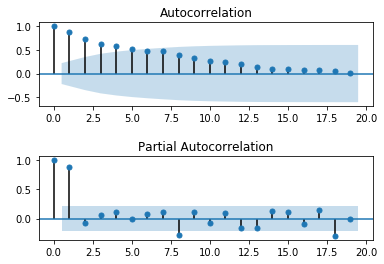

In [2]:
from pandas import read_csv
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

# load data
series = read_csv('C:\Program Files/Python36/suven/Data Anaylsis/Dataset/yearly-water-usage.csv', header=0, index_col=0)

fig = pyplot.figure()
fig.subplots_adjust(hspace=0.6)
pyplot.subplot(211)
plot_acf(series, ax=pyplot.gca()) # gca -> "GetCurrentAxis"
# Plots lags on the horizontal and the correlations on vertical axis.

pyplot.subplot(212)
plot_pacf(series, ax=pyplot.gca())
pyplot.show();

`How to Read the above ACF and PACF plots ?`
--
and 
**`also how to deduce p and q values for ARIMA`**

**plot_acf(series)** 
Running the example creates a 2D plot showing the `lag value` along the **x-axis** and the `correlation` on the y-axis between **-1 and 1**.

`Confidence intervals` are drawn as a cone. By default, this is set to a `95% confidence interval`, suggesting that correlation values outside of this cone are very likely a correlation and not a statistical fluke.

> `Tip` : By default, all lag values are printed, which makes the plot noisy.
We can limit the number of lags on the x-axis like this :
`plot_acf(series, lags=50)`
to make the plot easier to read. In our case yearly-water-usage.csv has fewer values.

**Now let’s check out on how we can figure out what value of p and q to use**. We have used two popular plotting techniques above; they are:

• `Autocorrelation Function (ACF)`: It just measures the correlation between two consecutive (lagged version). example at lag 4, ACF will compare series at time instance t1…t2 with series at instance t1–4…t2–4

• `Partial Autocorrelation Function (PACF)`: is used to measure the degree of association between y(t) and y(t-p).

• p: The point where the PACF crosses the upper confidence interval and is the highest, here its 0 ( *look at x = 0* ). hence p = 0. This means at lag = 0, we get the highest correlation. 

• q: The point where the ACF crosses the upper confidence interval and is the highest. Here its close to 0. hence q = 0.

**`This quick analysis suggests an ARIMA(0,1,0) on the raw data may be a good starting point`**

In [4]:
import warnings
warnings.filterwarnings('ignore')

from pandas import read_csv
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt

# load data
series = read_csv('C:\Program Files/Python36/suven/Data Anaylsis/Dataset/yearly-water-usage.csv', header=0, index_col=0)

# prepare data
X = series.values
X = X.astype('float32')

train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

# walk-forward validation
history = [x for x in train]#to_list()
predictions = list()

for i in range(len(test)):
	# predict
	model = ARIMA(history, order=(0,1,0))
	model_fit = model.fit(disp=0) 
    # By default, disp parameter is set to 1, which shows convergence output.
    # Set disp to 0, because it is critical in removing all of the convergence output when evaluating the ARIMA model using walk-forward validation.
    # Setting it to False turns off all of this noise i.e extra unwanted o/p.
	yhat = model_fit.forecast()[0] #returns 3 values hence we take the 0th term
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
    
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=495.579, Expected=503
>Predicted=506.769, Expected=503
>Predicted=506.675, Expected=450
>Predicted=452.293, Expected=432
>Predicted=433.810, Expected=432
>Predicted=433.767, Expected=458
>Predicted=460.318, Expected=462
>Predicted=464.356, Expected=503
>Predicted=506.196, Expected=488
>Predicted=490.809, Expected=466
>Predicted=468.292, Expected=492
>Predicted=494.776, Expected=503
>Predicted=505.940, Expected=515
>Predicted=518.118, Expected=500
>Predicted=502.769, Expected=522
>Predicted=525.132, Expected=575
>Predicted=579.056, Expected=583
>Predicted=587.127, Expected=587
>Predicted=591.125, Expected=628
>Predicted=632.772, Expected=640
>Predicted=644.897, Expected=609
>Predicted=613.288, Expected=606
>Predicted=610.167, Expected=632
>Predicted=636.525, Expected=617
>Predicted=621.210, Expected=613
>Predicted=617.079, Expected=598
>Predicted=601.781, Expected=575
>Predicted=578.369, Expected=564
>Predicted=567.152, Expected=549
>Predicted=551.881, Expected=538
>Predicted

**Grid Search ARIMA Hyperparameters**

The ACF and PACF plots suggest that we cannot do better than a **persistence model on this dataset.** (`in persistence model we got rmse of approx 21.658` - see **NB 9_C**)

To confirm this analysis, we can grid search a suite of ARIMA hyperparameters and check that no models result in better out of sample RMSE performance.

In this section, we will search values of p, d, and q combinations and find the combination that results in the best performance. We will use a grid search to explore all combinations in a subset of integer values.

Specifically, we will search all combinations of the following parameters:

`p: 0 to 4.`

`d: 0 to 2.`

`q: 0 to 4.`

This is (5 * 3 * 5), or 75 potential runs of the test harness, and will take some time to execute. We will **also disable** the automatic addition of a trend constant from the model by setting the ‘trend‘ argument to ‘nc‘ for no constant when calling fit().

> **Note** : The "trend" Parameter : The trend parameter adds an additional constant term to the model. Think of it like a `bias or intercept term`.
It is described as: Whether to include a constant or not. 'c' includes constant, 'nc' no constant. By default, a trend term is enabled with trend set to ‘c‘.

In [9]:
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
 
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	X = X.astype('float32')
	train_size = int(len(X) * 0.50)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		# model_fit = model.fit(disp=0)
		model_fit = model.fit(trend='nc', disp=0) #disp=0 stops arima from displaying the values
		yhat = model_fit.forecast()[0] # [0] -> indicates the value of the forecast
        # see syntax of forecast function here -> 
        # http://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMAResults.forecast.html?highlight=forecast#statsmodels.tsa.arima_model.ARIMAResults.forecast
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	mse = mean_squared_error(test, predictions)
	rmse = sqrt(mse)
	return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s RMSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 # load data
series = read_csv('C:\Program Files/Python36/suven/Data Anaylsis/Dataset/yearly-water-usage.csv', header=0, index_col=0)

# evaluate parameters
p_values = range(0,5)
d_values = range(0,3)
q_values = range(0,5)
warnings.filterwarnings("ignore")
evaluate_models(series.values,p_values,d_values,q_values)



ARIMA(0, 0, 1) RMSE=288.153
ARIMA(0, 0, 2) RMSE=165.011
ARIMA(0, 0, 3) RMSE=98.734
ARIMA(0, 0, 4) RMSE=76.216
ARIMA(0, 1, 1) RMSE=21.627
ARIMA(0, 1, 2) RMSE=21.834
ARIMA(0, 1, 3) RMSE=23.956
ARIMA(0, 1, 4) RMSE=24.075
ARIMA(0, 2, 1) RMSE=21.703
ARIMA(0, 2, 2) RMSE=21.640
ARIMA(0, 2, 3) RMSE=21.686
ARIMA(0, 2, 4) RMSE=25.219
ARIMA(1, 0, 0) RMSE=22.005
ARIMA(1, 1, 0) RMSE=21.636
ARIMA(1, 2, 0) RMSE=27.398
ARIMA(1, 2, 1) RMSE=21.658
ARIMA(1, 2, 2) RMSE=23.273
ARIMA(2, 0, 0) RMSE=21.995
ARIMA(2, 1, 0) RMSE=21.426
ARIMA(2, 2, 0) RMSE=25.105
ARIMA(2, 2, 3) RMSE=24.727
ARIMA(3, 0, 0) RMSE=21.881
ARIMA(3, 1, 0) RMSE=23.402
ARIMA(3, 1, 1) RMSE=24.094
ARIMA(3, 2, 0) RMSE=24.438
ARIMA(3, 2, 1) RMSE=23.395
ARIMA(4, 0, 0) RMSE=23.732
ARIMA(4, 1, 0) RMSE=23.635
ARIMA(4, 1, 1) RMSE=23.966
ARIMA(4, 1, 2) RMSE=23.974
ARIMA(4, 2, 0) RMSE=25.686
ARIMA(4, 2, 1) RMSE=23.623
ARIMA(4, 2, 2) RMSE=23.813
Best ARIMA(2, 1, 0) RMSE=21.426


The results show that the best configuration discovered was ____________ with an RMSE of ______, slightly lower than the manual persistence model **tested earlier in NB 9_C.**

Make Prediction: 
--
Load/Use the finalized model and make a prediction.

In [10]:
# load data
series = read_csv('C:\Program Files/Python36/suven/Data Anaylsis/Dataset/yearly-water-usage.csv', header=0, index_col=0)

# prepare data
X = series.values
X = X.astype('float32')

# fit model
model = ARIMA(X,order=(2,1,0))
model_fit=model.fit(trend='nc',disp=0)
# http://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.fit.html?highlight=arima%20fit#statsmodels.tsa.arima_model.ARIMA.fit
yhat = model_fit.forecast(steps=4,alpha=0.05)


# default alpha=0.05  i.e 95% confidence
# check the syntax of forecast here
# http://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMAResults.forecast.html?highlight=forecast#statsmodels.tsa.arima_model.ARIMAResults.forecast
print(yhat)

# we are predicting 4 new values -> see first array
# in 2nd array -> we get the Array of the standard errors, of the forecasts.
# in 3rd array -> we get 2d array of the confidence interval for the forecast

(array([608.49653874, 609.56465725, 610.08325858, 609.9932122 ]), array([32.69860456, 47.24018087, 56.35012907, 64.04111523]), array([[544.40845145, 672.58462603],
       [516.97560412, 702.15371038],
       [499.63903509, 720.52748207],
       [484.47493283, 735.51149158]]))
